In [1]:

import pandas as pd
import numpy as np
import cv2
import os
import glob
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "Face Mask Dataset/"

In [3]:
dataset = {
    "image_path": [],
    "mask_status": [],
    "where": []
}

for where in os.listdir(path):
    for status in os.listdir(path+"//"+where):
        for image in glob.glob(path+where+"//"+status+"//"+"*.png"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)
            
dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,Face Mask Dataset/Test//WithMask\1163.png,WithMask,Test
1,Face Mask Dataset/Test//WithMask\1174.png,WithMask,Test
2,Face Mask Dataset/Test//WithMask\1175.png,WithMask,Test
3,Face Mask Dataset/Test//WithMask\1203.png,WithMask,Test
4,Face Mask Dataset/Test//WithMask\1361.png,WithMask,Test


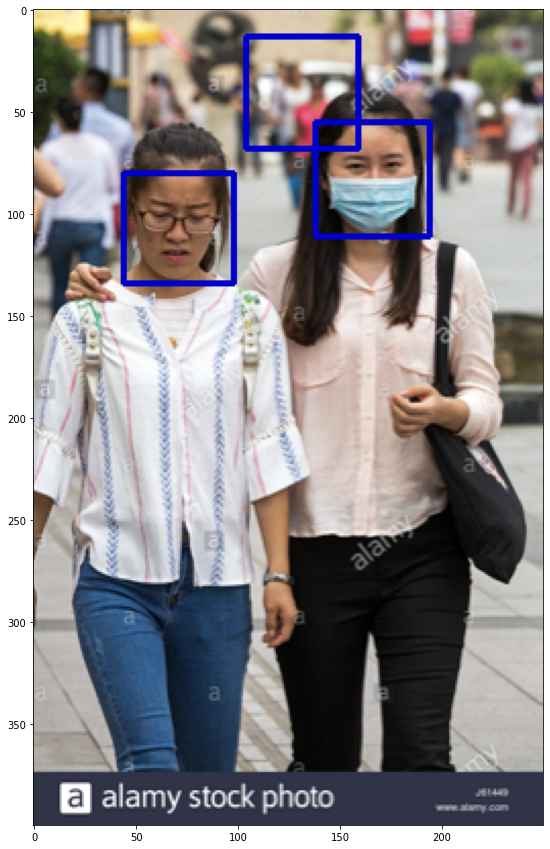

In [4]:

face_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread("images/maksssksksss352.png")

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

detected_face = face_model.detectMultiScale(img)

output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

for (x, y, w, h) in detected_face:
    cv2.rectangle(output_img, (x,y), (x+w, y+h), (0, 0, 200), 2)

plt.figure(figsize = (15, 15))
plt.imshow(output_img)

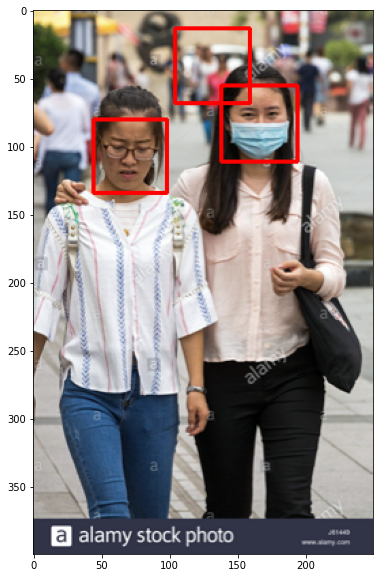

In [5]:
if len(detected_face) >= 2:
   
    label = [0 for i in range(len(detected_face))]
    
   
    for i in range(len(detected_face)-1):
        for j in range(i+1, len(detected_face)):
           
            dist = distance.euclidean(detected_face[i][:2], detected_face[j][:2])
            
            if dist < 130:
               
                label[i] = 1
                label[j] = 1
    
    
    new_image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    
    for i in range(len(detected_face)):
        (x, y, w, h) = detected_face[i]
        if label[i] == 1:
            
            cv2.rectangle(new_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        else:
           
            cv2.rectangle(new_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
         
    plt.figure(figsize = (10, 10))
    plt.imshow(new_image)

<AxesSubplot:xlabel='mask_status', ylabel='count'>

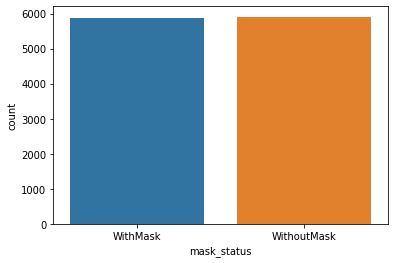

In [6]:




sns.countplot(x = dataset["mask_status"])

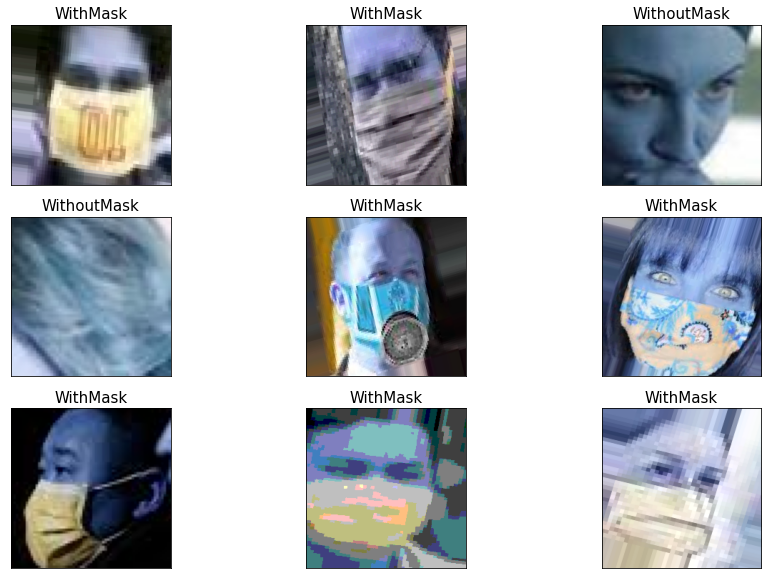

In [7]:
plt.figure(figsize = (15, 10))

for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.imread(dataset.loc[random,"image_path"]))
    plt.title(dataset.loc[random,"mask_status"], size = 15)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [8]:

train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

train_df = train_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)
valid_df = valid_df.sample(frac = 1)

print("\n After Shuffling \n")
print(train_df.head(10))

                                      image_path mask_status  where
992     Face Mask Dataset/Train//WithMask\10.png    WithMask  Train
993    Face Mask Dataset/Train//WithMask\100.png    WithMask  Train
994   Face Mask Dataset/Train//WithMask\1004.png    WithMask  Train
995   Face Mask Dataset/Train//WithMask\1005.png    WithMask  Train
996   Face Mask Dataset/Train//WithMask\1006.png    WithMask  Train
997   Face Mask Dataset/Train//WithMask\1007.png    WithMask  Train
998   Face Mask Dataset/Train//WithMask\1008.png    WithMask  Train
999   Face Mask Dataset/Train//WithMask\1011.png    WithMask  Train
1000  Face Mask Dataset/Train//WithMask\1012.png    WithMask  Train
1001  Face Mask Dataset/Train//WithMask\1018.png    WithMask  Train

 After Shuffling 

                                             image_path  mask_status  where
3592  Face Mask Dataset/Train//WithMask\Augmented_44...     WithMask  Train
4021  Face Mask Dataset/Train//WithMask\Augmented_52...     WithMask  Train
2113

In [9]:
train_df = train_df.reset_index().drop("index", axis = 1)
train_df.head()

,image_path,mask_status,where
0,Face Mask Dataset/Train//WithMask\Augmented_44...,WithMask,Train
1,Face Mask Dataset/Train//WithMask\Augmented_52...,WithMask,Train
2,Face Mask Dataset/Train//WithMask\Augmented_17...,WithMask,Train
3,Face Mask Dataset/Train//WithoutMask\3190.png,WithoutMask,Train
4,Face Mask Dataset/Train//WithoutMask\4063.png,WithoutMask,Train


In [10]:

data = []
image_size = 150

for i in range(len(train_df)):

    img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)


    new_image_array = cv2.resize(img_array, (image_size, image_size))

    if train_df["mask_status"][i] == "WithMask":
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])

In [11]:
data = np.array(data)

C:\Users\murali\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [12]:
data[0][0].shape

(150, 150)

In [13]:

np.random.shuffle(data)

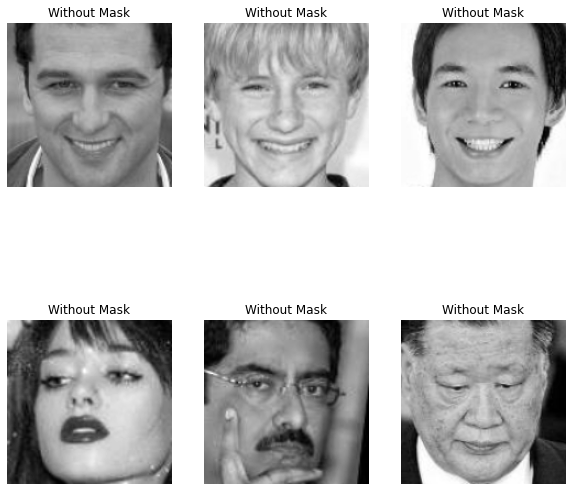

In [14]:


fig, ax = plt.subplots(2, 3, figsize=(10, 10))

for row in range(2):
    for col in range(3):
        image_index = row*100+col
        
        ax[row, col].axis("off")
        ax[row,col].imshow(data[image_index][0], cmap = "gray")
    
        if data[image_index][1] == 0:
            ax[row, col].set_title("Without Mask")
        else:
            ax[row, col].set_title("With Mask")
            
plt.show()

In [15]:
# datagen = ImageDataGenerator(rescale = 1./255)

# train_generator=datagen.flow_from_dataframe(
# dataframe=train_df,
# directory="../input",
# x_col="image_path",
# y_col="mask_status",
# batch_size=80,
# seed=42,
# shuffle=False,
# class_mode="binary",
# target_size=(150,150))

In [16]:
X = []
y = []

for image in data:
    X.append(image[0])
    y.append(image[1])

X = np.array(X)
y = np.array(y)

In [17]:

X = X
ac=[]
from sklearn.metrics import *
from lib.utils import *
X,y=scaler_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
import tensorflow as tf
model=tf.keras.layers.LSTM(
    units=1,
    activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False
)


from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=4))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=10)
ac.append(accuracy_score(model,y_val,sample_weight=0.2)*100)


Epoch 1/10
4/4 [==============================] - 0s 0s/step - loss: 1.1679
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 1.0453
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9455
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 0.8367
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 0.7422
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6438
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 0.5602
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4725
Epoch 9/10
4/4 [==============================] - 0s 344us/step - loss: 0.3915
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.3194


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
x = layers.Input(shape=(12, 7)) 
cell = layers.SimpleRNNCell(3, activation='tanh')  
rnn = layers.RNN(cell)
rnn_output = rnn(x)
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=4))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=5)
ac.append(accuracy_score(model,y_val,sample_weight=1)*100)

Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 1.9256
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 1.8025
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 1.6824
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 1.5820
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 1.4819


The accuracy of LSTM is 99.27 and RNN is 97.963


C:\Users\murali\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(70.0, 100.0)

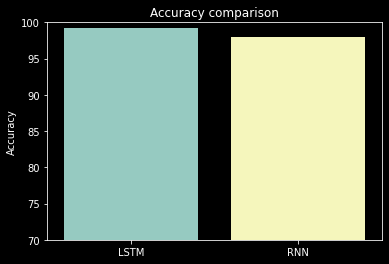

In [20]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('dark_background')
x=['LSTM','RNN']
 
ax=sns.barplot(x,ac[:2])
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("The accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(70,100)